In [1]:
%reload_ext autoreload
%autoreload 2

In [18]:
!ls ~/.datasets/Lenta.Ru-News-Dataset

download_lenta.py		    lenta_titles_lm
lenta-ru-news-2019-2020.csv	    README.md
lenta-ru-news-2019-2020-titles.csv  requirements.txt


In [19]:
DATA_PATH = f'/home/kuptservol/.datasets/Lenta.Ru-News-Dataset/lenta-ru-news-2019-2020.csv'

In [20]:
import pandas as pd

In [ ]:
lenta = pd.read_csv(DATA_PATH);

In [16]:
titles = lenta['title']

In [13]:
titles.to_csv('/home/kuptservol/.datasets/Lenta.Ru-News-Dataset/lenta-ru-news-2019-2020-titles.csv', index=False)

/home/kuptservol/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [21]:
TITLES = f'/home/kuptservol/.datasets/Lenta.Ru-News-Dataset/lenta-ru-news-2019-2020-titles.csv'

## FastAI Pretrained transfer learned russian wiki

In [22]:
from fastai import *
from fastai.text import *

In [23]:
torch.cuda.set_device(0)

In [24]:
data_path = Config.data_path()

In [25]:
lang = 'ru'
name = f'{lang}wiki'
path = data_path/name

In [26]:
! ls {path}

data_lm				    ru_databunch
docs				    ru_textlist_class
lenta-ru-news-2019-2020-titles.csv  ruwiki
lenta_titles_lm			    ruwiki-latest-pages-articles.xml
log				    wikiextractor
models


In [27]:
! cp {TITLES} {path}

In [28]:
# bs=48
# bs=24
bs=128

In [34]:
lenta_titles_lm = (TextList.from_csv(path, 'lenta-ru-news-2019-2020-titles.csv')
    .split_by_rand_pct(0.1, seed=42)
    .label_for_lm()           
    .databunch(bs=bs, num_workers=1))

In [35]:
lenta_titles_lm.save(f'lenta_titles_lm')

In [29]:
lenta_titles_lm = load_data(path, 'lenta_titles_lm', bs=bs)

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
lm_fns = ['ru_wt.4', 'ru_wt_vocab']

In [35]:
learn_lm = language_model_learner(lenta_titles_lm, AWD_LSTM, pretrained_fnames=lm_fns, drop_mult=1.0)

In [39]:
learn_lm.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


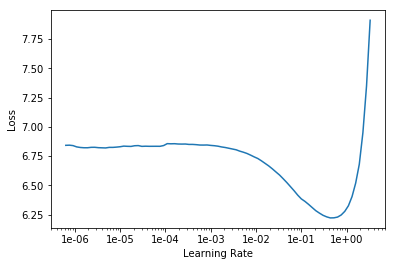

In [40]:
learn_lm.recorder.plot()

In [36]:
lr = 1e-2

In [37]:
learn_lm.fit_one_cycle(2, lr*10, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.919007,4.930799,0.314286,00:18
1,4.417678,4.517805,0.357143,00:17


In [38]:
learn_lm.save(f'lenta_titles')
learn_lm.save_encoder(f'lenta_titles_enc')

In [39]:
learn_lm.unfreeze()
learn_lm.fit_one_cycle(8, lr, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.829658,4.258080,0.357143,00:22
1,3.624947,4.001123,0.371429,00:22
2,3.451524,3.936731,0.400000,00:21
3,3.271042,3.752093,0.414286,00:21
4,3.100977,3.701032,0.385714,00:21
5,2.944757,3.643425,0.442857,00:21
6,2.823218,3.654185,0.428571,00:22
7,2.738399,3.655936,0.442857,00:22


In [40]:
learn_lm.save(f'lenta_titles')
learn_lm.save_encoder(f'lenta_titles_enc')

In [35]:
learn_lm = language_model_learner(lenta_titles_lm, AWD_LSTM, pretrained_fnames=lm_fns, drop_mult=1.0)

In [36]:
learn_lm.load(f'lenta_titles')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (85280 items)
x: LMTextList
xxbos xxmaj украинский комик поборется за   президентский пост,xxbos xxmaj xxunk политиков обвинили в   попытке вернуть страну в   xxup xvii век,xxbos xxmaj климкин xxunk из - за советских фильмов,xxbos xxmaj уточнено число пропавших после обрушения дома в   xxmaj магнитогорске,xxbos xxmaj российская молодежка обыграла канадцев на   xxup чм по   хоккею
y: LMLabelList
,,,,
Path: /home/kuptservol/.fastai/data/ruwiki;

Valid: LabelList (9475 items)
x: LMTextList
xxbos xxup ssj-100   развернулся из - за технических проблем,xxbos xxmaj пьяный китаец проглотил xxunk и   чудом избежал взрыва желудка,xxbos xxmaj рабинович накормил xxunk заключенных московского xxup сизо,xxbos xxmaj белоруссия показала способ надавить на   xxmaj россию по   нефти,xxbos xxmaj оценена эффективность американского препарата против коронавируса
y: LMLabelList
,,,,
Path: /home/kuptservol/.fastai/data/ruwiki;

Test: None, model=Sequent

In [45]:
def generate_samples(prefix='', temps=[0.2, 0.5, 0.75, 1.]):
    for temp in temps:
        print('####################')
        print('Temperature: ' + str(temp))
        print('####################')
        for i in range(3):
            text = learn_lm.predict(prefix, 25, temperature=temp)
            print(text[:text.index('xxbos')])
            print('\n')

In [46]:
generate_samples()

####################
Temperature: 0.2
####################
 Российский регион начал торговать популярным доступным бизнесом 


 Российские ученые создали « Турецкий поток » 


 Путин поручил создать новую мегатрассу в   Арктике 


####################
Temperature: 0.5
####################
 Россия усилит Японию 


 Россия рассказала о   планах по   вступлению в   НАТО 


 Путин поручил создать новую мегатрассу на   Дальнем Востоке 


####################
Temperature: 0.75
####################
 Умер актер Геннадий Харитонов 


 Собчак раскрыла подробности нового обмена заключенными с   Грузией 


 Сотрудница российского банка похитила миллионы и   раскрыла детали нападения 


####################
Temperature: 1.0
####################
 Порошенко рассказали о « самом страшном » моменте 


 Трамп нашел способ проводить ад из - за Крыму 


 Назван лучший российский город для путешествий на   время пандемии коронавируса 




In [47]:
generate_samples()

####################
Temperature: 0.2
####################
 Названы самые популярные у   россиян товары в   России 


 Россия и   Белоруссия договорились о   сотрудничестве 


 Российский регион закупит оборудование для цифровой экономики 


####################
Temperature: 0.5
####################
 Раскрыты подробности лечения Заворотнюк 


 Стратегический тренер сборной России ответил на   вопрос о   допинге 


 На Украине предложили ввести новый налог 


####################
Temperature: 0.75
####################
 Лавров рассказал о   борьбе с   коронавирусом 


 Мишустин заявил о   необходимости Украины и   России объединить Украину 


 Неудачная гибель ребенка на   пляже попала на   видео 


####################
Temperature: 1.0
####################
 Турция призвала США спрятаться от   санкции США 


 Объяснен дефицит сахара 


 Популярный порносайт выйдет на   музыкальный уровень « Давай поженимся ! » 




In [48]:
generate_samples(prefix='мошенники')

####################
Temperature: 0.2
####################
мошенники нашли способ заработать на   россиянах 


мошенники нашли способ нажиться на   россиянах 


мошенники стали чаще подделывать 


####################
Temperature: 0.5
####################
мошенники нашли способ нажиться на   россиянах 


мошенники появилось видео с   места расстрела полицейских в   Пакистане 


мошенники для Android оказались под угрозой блокировки 


####################
Temperature: 0.75
####################
мошенники нашли способ потратить деньги на   путешествия 


мошенники нашли способ завести коронавирус 


мошенники решили взломать Telegram 


####################
Temperature: 1.0
####################
мошенники вспомнили о « зассавшем » в   Telegram 


мошенники су-34 больше 100   рублей получат компенсации за   антисептик журналистов 


мошенники спросили о   сбитом Т-72   в бессилии Таганской ОПГ 




In [51]:
generate_samples(prefix='британские ученые')

####################
Temperature: 0.2
####################
британские ученые изучат судьбу Луны 


британские ученые изучат судьбу коронавируса 


британские ученые создали прибор для лечения коронавируса 


####################
Temperature: 0.5
####################
британские ученые разработали новый способ борьбы с   болезнью 


британские ученые получат гранты на   развитие инфраструктуры 


британские ученые нашли в   России способ побороть Украину 


####################
Temperature: 0.75
####################
британские ученые создали « Купол » 


британские ученые создали систему для лечения рака 


британские ученые создали « Око » 


####################
Temperature: 1.0
####################
британские ученые объяснили успехом Нового года 


британские ученые ворвались за   курение на   хорошей площади 


британские ученые придумали новый способ борьбы с   коронавирусом 




## Textgenrnn

In [2]:
from textgenrnn import textgenrnn

Using TensorFlow backend.


In [3]:
MODEL_PATH = f'/home/kuptservol/.models/textgenrnn/'

In [4]:
def create_textgen(model_name):
    return textgenrnn(weights_path=MODEL_PATH + '{}_weights.hdf5'.format(model_name),
                     vocab_path=MODEL_PATH + '{}_vocab.json'.format(model_name),
                     config_path=MODEL_PATH + '{}_config.json'.format(model_name),
                     name=model_name)

train 
https://colab.research.google.com/drive/1d4L2ejQI4BGs3Pj7briqSgn5NSGHQgrL

In [5]:
textgen = create_textgen('lenta-title-char_lvl')

In [52]:
textgen.generate_samples()

####################
Temperature: 0.2
####################
Россияне стали чаще поддержать продукты

В России предложили провести программу секса и попал на видео

В России подорожали на подиуме и попал на видео

####################
Temperature: 0.5
####################
Российский боец UFC продолжит производить приезд Кириллова

Обвиненные по делу о карантине на борту самолета в Иране

Стало известно о подготовке выхода из семьи по ипотеке

####################
Temperature: 1.0
####################
В Анапе Бессонда завоевали из-за освобождения

На Украине предложили бороться с кафе и четырьмя погибли ее нефти

Появились первые результаты падорожных отгровов



In [7]:
textgen.generate_samples()


####################
Temperature: 0.2
####################
В России подорожали с помощью к российским послам

Россияне назвали самые популярные у россиян с коронавирусом

В России отреагировали на предложение Зеленского о поддержке Кокорина и Мамаева в самолете

####################
Temperature: 0.5
####################
В России заявили о нехватке происхождения к убийству жизни в России

В России создадут «Спартак»

Объяснена роль Кадырова помогать в больницы для ребенка

####################
Temperature: 1.0
####################
Затравленному оружием давать без наркоторговца

Мишустин зафиксировал главный штраф

Пригодные предсмертные коронавирусом туриста затрясло в тюрьму полицейского



In [53]:
textgen.generate_samples(prefix='британские ученые')

####################
Temperature: 0.2
####################
британские ученые признались в нежелании покупать свадьбу в сети

британские ученые поделились секретом поддержки детей

британские ученые признались в недостатке страны

####################
Temperature: 0.5
####################
британские ученые изучат продажу по ремонту после катастрофы

британские ученые признались в любви к списке к ремонту за попытку взорвать в сети

британские ученые высказались о соблюдении страны

####################
Temperature: 1.0
####################
британские ученые захотели заступать бедро

британские ученые попали на видео

британские ученые разросали аннексивным прокляем



In [54]:
generate_samples(prefix='мошенники')

####################
Temperature: 0.2
####################
мошенники нашли способ нажиться на   россиянах 


мошенники нашли способ заработать на   россиянах 


мошенники нашли способ заработать на   россиянах 


####################
Temperature: 0.5
####################
мошенники по   делу о   крушении Boeing 737   MAX сняли на   видео 


мошенники признали виновным в   сексуальном насилии 


мошенники стали чаще подделывать на   Украину 


####################
Temperature: 0.75
####################
мошенники нашли у   Калви « зеленый авианосец » 


мошенники нашли способ решить проблему с   коронавирусом 


мошенники по   делу о   прорыве дамбы под Красноярском снова захватили 


####################
Temperature: 1.0
####################
мошенники спецпропусков с   перелет при крещении в   США 


мошенники появились новые подробности жизни Коби Брайанта 


мошенники московских оленей отказались от   прививок 




In [56]:
textgen = create_textgen('lenta-title-word_lvl')

OSError: Unable to open file (truncated file: eof = 20156145, sblock->base_addr = 0, stored_eof = 42912064)

## GPT-2